<a href="https://colab.research.google.com/github/Kanch-prog/superheroes_analysis/blob/main/Superheroes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/characters_stats.csv')
df.head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
6,Adam Monroe,good,63,10,12,100,71,64,320
7,Adam Strange,good,1,1,1,1,0,1,5
8,Agent 13,good,1,1,1,1,0,1,5
9,Agent Bob,good,10,8,13,5,5,20,61


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

# Dropping missing values
df = df.dropna(axis=0)

# Verify that there are no missing values
df.isnull().sum()

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

In [6]:
# Check data types
df.dtypes

Name            object
Alignment       object
Intelligence     int64
Strength         int64
Speed            int64
Durability       int64
Power            int64
Combat           int64
Total            int64
dtype: object

In [7]:
#getting the count of good, bad an neutral count
count = df['Alignment'].value_counts()
print(count)

Alignment
good       432
bad        165
neutral     11
Name: count, dtype: int64


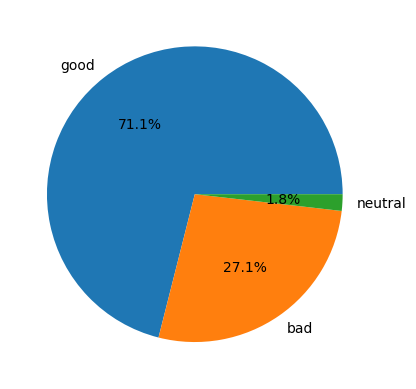

In [8]:
#plot a pie-plot for nature of super heroes
label = ['good', 'bad', 'neutral']
plt.pie(count, labels=label, autopct='%1.1f%%')
plt.show()

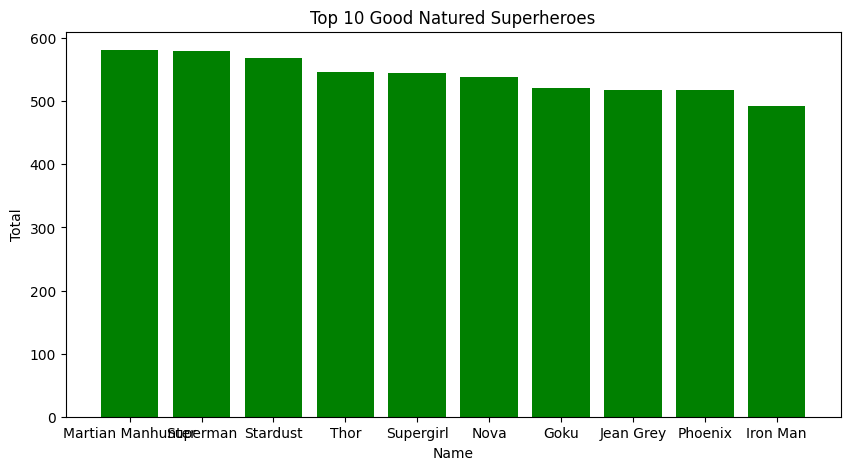

In [9]:
#find the top ten good natured superheroes
good = df[df['Alignment'] == 'good']
top_ten_good = good.sort_values(by='Total', ascending=False).head(10)

# setting width and height of the figure
plt.figure(figsize=(10, 5))
x = top_ten_good['Name']
y = top_ten_good['Total']
plt.bar(x, y)
plt.xlabel('Name')
plt.ylabel('Total')
plt.title('Top 10 Good Natured Superheroes')
plt.bar(x, y, color="g")
plt.show()


In [14]:
# Good Superheroes with highest Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat...
Max_attribute = good.sort_values(
    by=['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat'], ascending=False)
Max_attribute.head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
537,Superman,good,100,100,100,100,94,85,579
361,Martian Manhunter,good,100,100,96,100,100,85,581
138,Captain Marvel,good,100,100,67,95,62,56,480
417,Nova,good,100,85,67,101,100,85,538
299,Iron Man,good,100,85,58,85,100,64,492
306,Jean Grey,good,100,80,67,100,100,70,517
433,Phoenix,good,100,80,67,100,100,70,517
589,Watcher,good,100,80,67,89,100,56,492
578,Vision,good,100,72,54,95,76,70,467
61,Batman,good,100,18,27,42,37,100,324


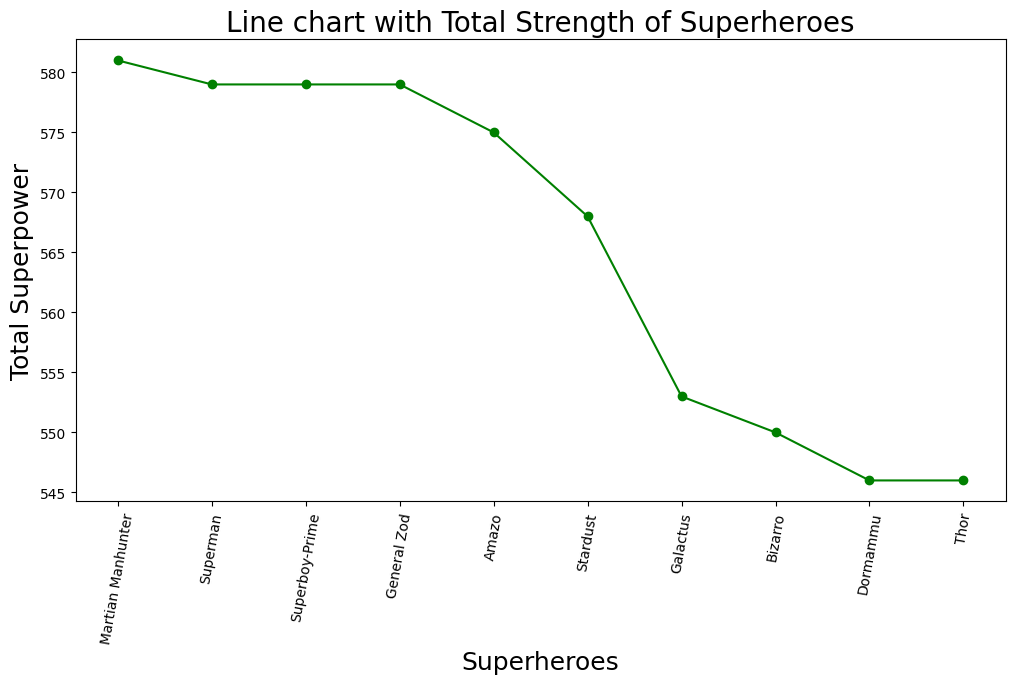

In [15]:
# Plotting superheroes with total superpower
plt.figure(figsize=(12, 6))
Top_ten_total = df.sort_values(by='Total', ascending=False).head(10)
X = Top_ten_total['Name']
Y = Top_ten_total['Total']
plt.xticks(rotation=80)

# plotting line chart
plt.plot(X, Y, 'o-', color='g')
plt.ylabel("Total Superpower", fontsize=18)
plt.xlabel("Superheroes", fontsize=18)
plt.title("Line chart with Total Strength of Superheroes", fontsize=20)
plt.show()

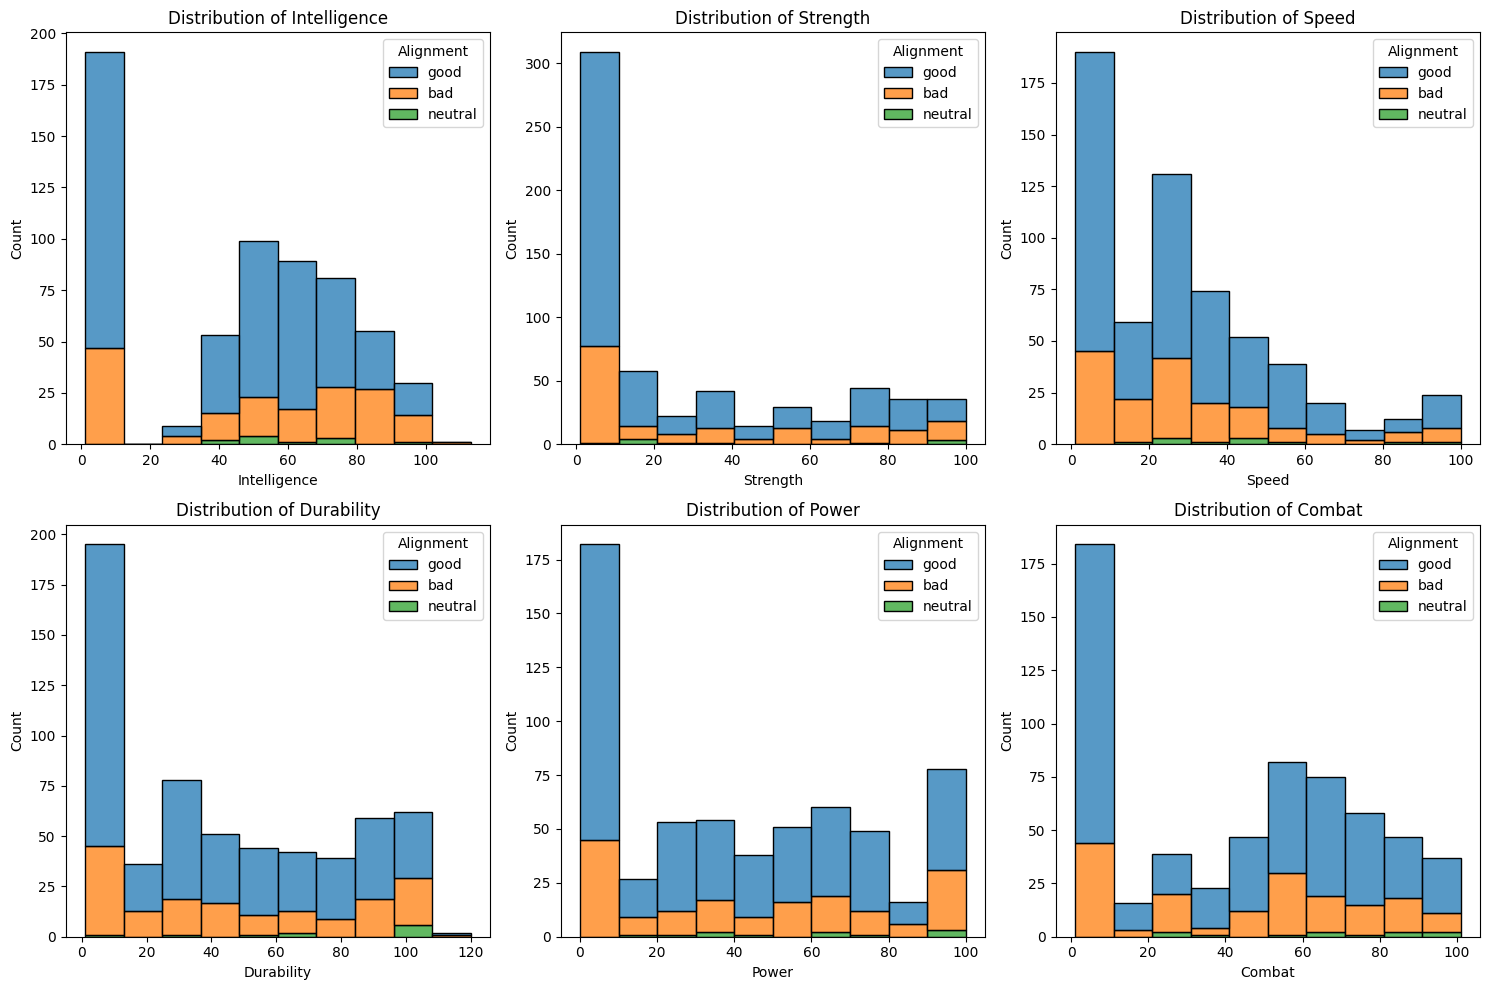

In [16]:
#histograms for the distribution of each attribute
attributes = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']

plt.figure(figsize=(15, 10))
for i, attribute in enumerate(attributes, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=attribute, hue='Alignment', multiple='stack', bins=10)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()
